In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
df= pd.read_csv("C:\\Users\\Clide Dcosta\\Desktop\\data science and decision making\\german_credit_data.csv",index_col=0)
import numpy as np
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.calibration import calibration_curve

In [2]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


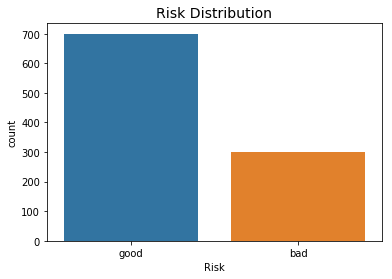

In [3]:
sns.countplot('Risk', data=df)
plt.title('Risk Distribution', fontsize=14)
plt.show()

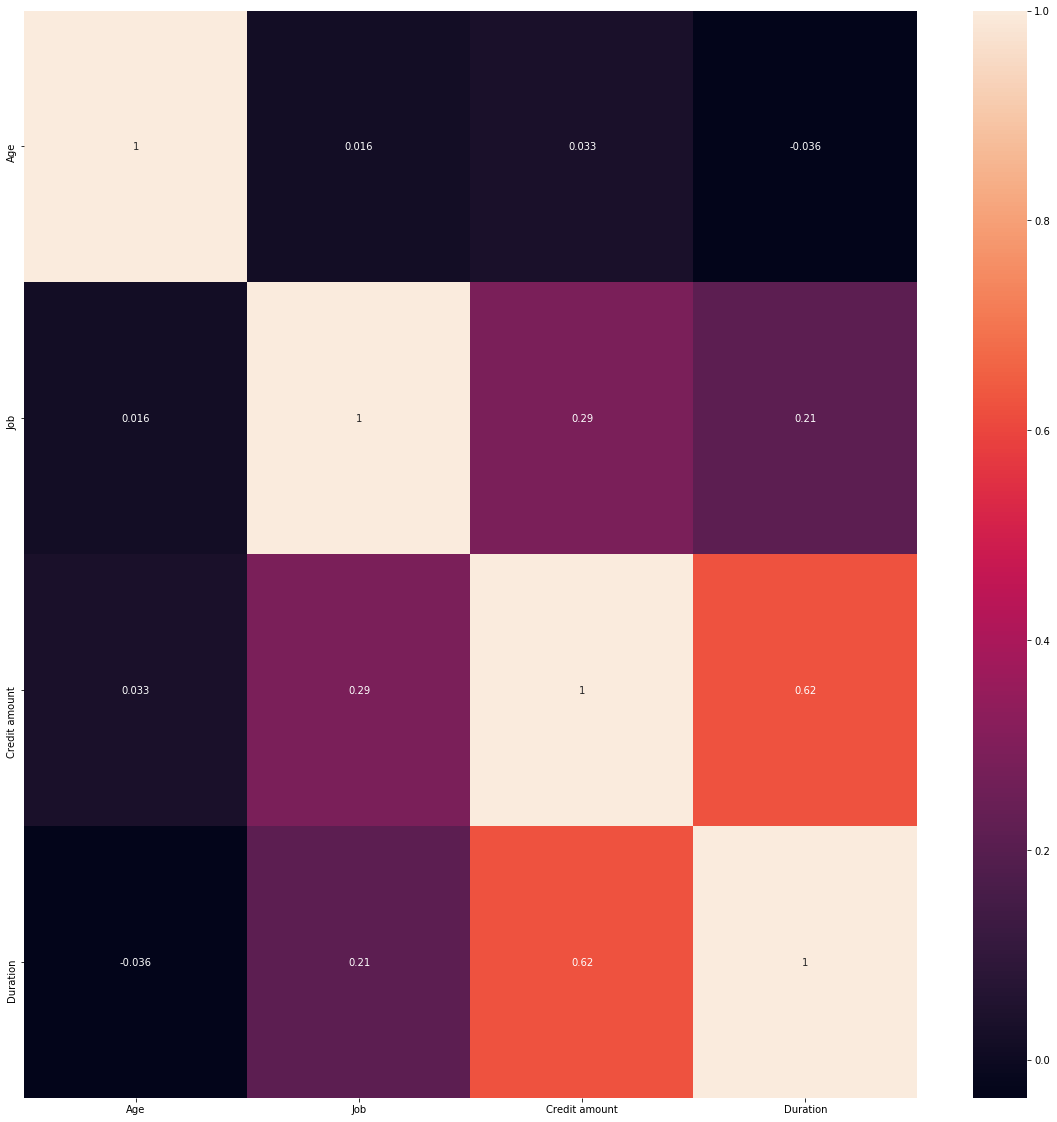

In [4]:
plt.figure(figsize =(20,20))
Corr=df[df.columns].corr()
sns.heatmap(Corr,annot=True)

In [5]:
# now let us check in the number of Percentage
Count_good_transaction = len(df[df["Risk"]=='good']) # good transaction are repersented by 0
Count_bad_transaction = len(df[df["Risk"]=='bad']) # bad by 1
Percentage_of_good_transaction = Count_good_transaction/(Count_good_transaction+Count_bad_transaction)
print("percentage of good transaction is",Percentage_of_good_transaction*100)
Percentage_of_bad_transaction= Count_bad_transaction/(Count_good_transaction+Count_bad_transaction)
print("percentage of bad transaction is",Percentage_of_bad_transaction*100)

percentage of good transaction is 70.0
percentage of bad transaction is 30.0


In [6]:
df = df.rename(columns={'Credit amount':'Credit'})

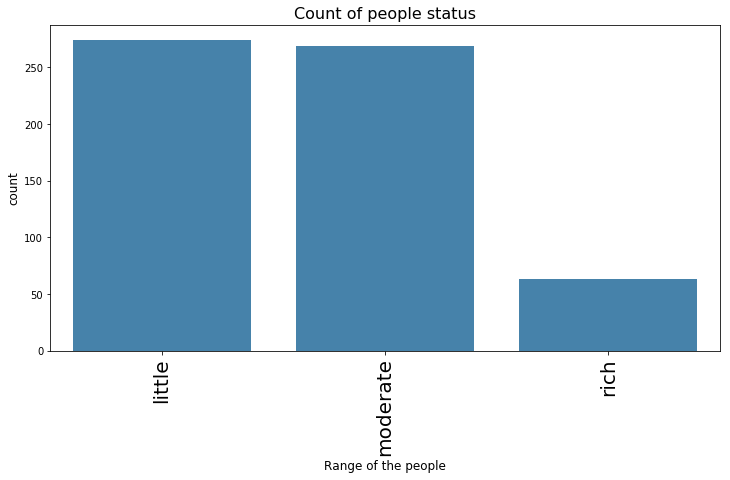

In [7]:
color = sns.color_palette()
temp = df['Checking account'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(temp.index, temp.values, alpha=0.9, color=color[0])
plt.xticks(rotation='vertical', fontsize=20)
plt.xlabel('Range of the people', fontsize=12)
plt.ylabel('count', fontsize=12)
plt.title("Count of people status", fontsize=16)
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df["Risk"]= le.fit_transform(df["Risk"])
df["Sex"] = le.fit_transform(df["Sex"])
df["Housing"] = le.fit_transform(df["Housing"])

In [9]:
df["Saving accounts"] = df["Saving accounts"].replace({"little":0, "moderate":1, "rich":2, "quite rich":3})
df["Checking account"] = df["Checking account"].replace({"little":0, "moderate":1, "rich":2})

In [16]:
df = df.fillna(1)
df1 = df.drop(columns = 'Purpose')
df1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit,Duration,Risk
0,67,1,2,1,1.0,0.0,1169,6,1
1,22,0,2,1,0.0,1.0,5951,48,0
2,49,1,1,1,0.0,1.0,2096,12,1
3,45,1,2,0,0.0,0.0,7882,42,1
4,53,1,2,0,0.0,0.0,4870,24,0


In [23]:
y=df1.Risk.values   # values => np array
x_data=df1.drop(["Risk"],axis=1)

In [24]:
#%% normalization   feature scaling
x=(x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [25]:
x.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit,Duration
0,0.857143,1.0,0.666667,0.5,0.333333,0.0,0.050567,0.029412
1,0.053571,0.0,0.666667,0.5,0.000000,0.5,0.313690,0.647059
2,0.535714,1.0,0.333333,0.5,0.000000,0.5,0.101574,0.117647
3,0.464286,1.0,0.666667,0.0,0.000000,0.0,0.419941,0.558824
4,0.607143,1.0,0.666667,0.0,0.000000,0.0,0.254209,0.294118


In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
scores_accuracy=[]

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=100,random_state=1) # n_estimators= number of trees
rf.fit(x_train,y_train)

rf_score = rf.score(x_test,y_test)  
scores_accuracy.append(["RF",rf_score])
prediction_of_probability = rf.predict_proba(x)
rf_score = rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
scores_accuracy.append(["RF",rf_score])
print("random forest result: ", rf.score(x_test,y_test))

random forest result:  0.7433333333333333


In [97]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.743333,0.770492,0.899522,0.830022


In [63]:
bin_classes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [64]:
bins = [0.0, 0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

In [66]:
x['prob_0'] = pd.cut(prediction_of_probability[:,0],bins,labels=bin_classes, include_lowest=True)

In [67]:
x['prob_1'] = pd.cut(prediction_of_probability[:,1],bins,labels=bin_classes, include_lowest=True)

In [68]:
x.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit,Duration,prob_1,prob_0
0,0.857143,1.0,0.666667,0.5,0.333333,0.0,0.050567,0.029412,1.0,0.1
1,0.053571,0.0,0.666667,0.5,0.000000,0.5,0.313690,0.647059,0.2,0.9
2,0.535714,1.0,0.333333,0.5,0.000000,0.5,0.101574,0.117647,0.9,0.1
3,0.464286,1.0,0.666667,0.0,0.000000,0.0,0.419941,0.558824,0.2,0.8
4,0.607143,1.0,0.666667,0.0,0.000000,0.0,0.254209,0.294118,0.3,0.8


In [73]:
x.drop(columns="prob_0",axis=1).head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit,Duration,prob_1
0,0.857143,1.0,0.666667,0.5,0.333333,0.0,0.050567,0.029412,1.0
1,0.053571,0.0,0.666667,0.5,0.000000,0.5,0.313690,0.647059,0.2
2,0.535714,1.0,0.333333,0.5,0.000000,0.5,0.101574,0.117647,0.9
3,0.464286,1.0,0.666667,0.0,0.000000,0.0,0.419941,0.558824,0.2
4,0.607143,1.0,0.666667,0.0,0.000000,0.0,0.254209,0.294118,0.3


In [91]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=0)

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
rlf = DecisionTreeClassifier(criterion="entropy",max_depth=4,random_state=0).fit(X_train1,y_train1)
y_pred1 =rlf.predict(X_test1)
from sklearn import metrics
# classification rate
T=metrics.accuracy_score(y_test1, y_pred1)
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1))

Accuracy: 0.89


In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test1, y_pred1)
prec = precision_score(y_test1, y_pred1)
rec = recall_score(y_test1, y_pred1)
f1 = f1_score(y_test1, y_pred1)
model_results = pd.DataFrame([['Random forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Random forest,0.89,0.916667,0.929577,0.923077


In [77]:
#Evaluating the model after transferring the knowledge
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test1, y_pred1))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test1, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test1, y_pred1)))  

Mean Absolute Error: 0.11
Mean Squared Error: 0.11
Root Mean Squared Error: 0.33166247903553997


In [78]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test1, y_pred1))  
print(classification_report(y_test1, y_pred1))  

[[ 46  12]
 [ 10 132]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.81        58
           1       0.92      0.93      0.92       142

   micro avg       0.89      0.89      0.89       200
   macro avg       0.87      0.86      0.87       200
weighted avg       0.89      0.89      0.89       200



In [81]:
#Performing other classification algorithms on the dataset
# Logistic regression classication
# LR with sklearn

from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(x_train,y_train)

lr_score = lr.score(x_test,y_test)
scores_accuracy.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(x_test,y_test)))

test accuracy 0.7266666666666667


D:\narcos\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [82]:
# KNN  classification
# Knn with sklearn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

knn_score = knn.score(x_test,y_test)
scores_accuracy.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(x_test,y_test)))

 9 nn score: 0.73 


In [83]:
# SVM Classification
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(x_train,y_train)

svm_score = svm.score(x_test,y_test)
scores_accuracy.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(x_test,y_test))

accuracy of svm algo:  0.6966666666666667


D:\narcos\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [84]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
nb_score = nb.score(x_test,y_test)
scores_accuracy.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(x_test,y_test))

print accuracy of naive bayes algo:  0.7166666666666667


In [85]:
# Decision Tree Classification
# Decision Tree With Sklearn
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred4=dt.predict(x_test)
dt_score = dt.score(x_test,y_test)
scores_accuracy.append(["DT",dt_score])

print("print accuracy of decision tree algo: ",dt.score(x_test,y_test))

print accuracy of decision tree algo:  0.6666666666666666


In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred4)
prec = precision_score(y_test, y_pred4)
rec = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)
model_results = pd.DataFrame([['Decision tree', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision tree,0.666667,0.748858,0.784689,0.766355


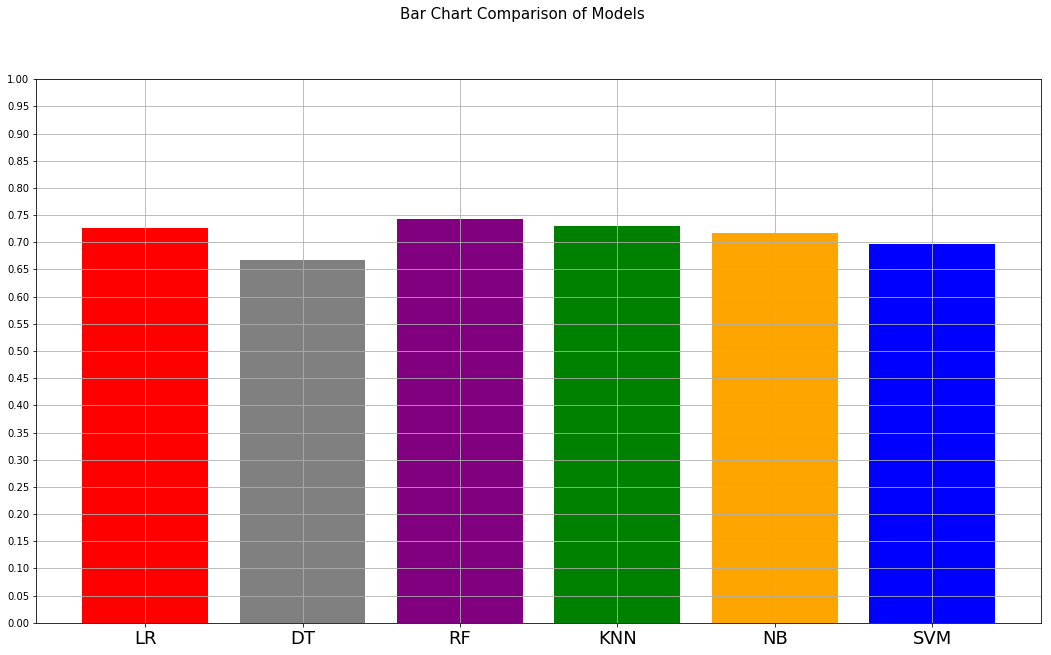

In [87]:
algorithms=("LR","DT","RF","KNN","NB","SVM")
scores = (lr_score,dt_score,rf_score,knn_score,nb_score,svm_score)
y_pos = np.arange(1,7)
colors = ("red","gray","purple","green","orange","blue")
plt.figure(figsize=(18,10))
plt.bar(y_pos,scores,color=colors)
plt.xticks(y_pos,algorithms,fontsize=18)
plt.yticks(np.arange(0.00, 1.01, step=0.05))
plt.grid()
plt.suptitle("Bar Chart Comparison of Models",fontsize=15)
plt.show()

In [93]:
#Applying the ml algorithms on the dataset after transfrring the knowledge
# Logistic regression classication
# LR with sklearn
scores_accuracy1=[]
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train1,y_train1)

lr_score1 = lr.score(X_test1,y_test1)
scores_accuracy1.append(["LR",lr_score])

print("test accuracy {}".format(lr.score(X_test1,y_test1)))


test accuracy 0.895


D:\narcos\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9) # n_neighbors = k
knn.fit(X_train1,y_train1)
prediction = knn.predict(X_test1)

knn_score1 = knn.score(X_test1,y_test1)
scores_accuracy1.append(["KNN",knn_score])
print(" {} nn score: {} ".format(9,knn.score(X_test1,y_test1)))

 9 nn score: 0.895 


In [95]:
# SVM with sklearn

from sklearn.svm import SVC

svm = SVC(random_state=1)
svm.fit(X_train1,y_train1)

svm_score1 = svm.score(X_test1,y_test1)
scores_accuracy1.append(["SVM",svm_score])

print("accuracy of svm algo: ", svm.score(X_test1,y_test1))

accuracy of svm algo:  0.895


D:\narcos\anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [96]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train1,y_train1)
nb_score1 = nb.score(X_test1,y_test1)
scores_accuracy1.append(["NB",nb_score])

print("print accuracy of naive bayes algo: ",nb.score(X_test1,y_test1))

print accuracy of naive bayes algo:  0.88
